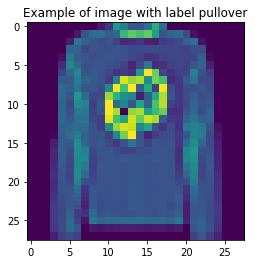

(28, 28)
2


In [21]:
"""
Created on Wed Feb 5 17:53:07 2020

@author: Dhirane Satvik Kona, Ramyatha Posani, Achyuth Maddala Sitaram, Mohit Bhagwat

Objective: Overfitting
"""
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline
# Download and load
data_collection = datasets.FashionMNIST('data_fashionMNIST', train=True, download=True)
# Illustration
label_fashion = dict([(0,'T-shirt'),(1,'trouser'),(2,'pullover'),(3,'dress'),(4,'coat'),
(5,'sandal'),(6,'shirt'),(7,'sneaker'),(8,'bag'),(9,'boot')])
X,y = data_collection.__getitem__(123)
plt.figure(1);plt.clf()
plt.imshow(X)
plt.title("Example of image with label "+label_fashion[y])
plt.show()
print(X.size)
print(y)

In [22]:
import numpy as np
# class LinearRegression():
#     """ Class for linear regression f(x) = W^T x + b """
#     def __init__(self,W,b):
#         self.W = W
#         self.b = b
#     def __call__(self,x):
#         return np.dot(self.W.T,x) + self.b

In [23]:
# W_0 = np.random.randn(28*28,10)
# b_0 = np.random.randn(10)
X1 = np.array(X)
# # intialization
# f = LinearRegression(W_0,b_0)
# s_bis = f(X1.flatten())
# print(s_bis)

In [24]:
# b_new = np.array([1000,0,0,0,0,0,0,0,0,-1000])
# f.b = b_new
# print(f(X1.flatten()))

In [25]:
import torch
import torch.nn as nn
# linear classifier
#   input: tensor of size 28x28=784
#   output: score of each of the 10 classes
myModel = nn.Linear(784,10)

In [26]:
print(myModel.state_dict())

OrderedDict([('weight', tensor([[-0.0205, -0.0240, -0.0276,  ..., -0.0057, -0.0034,  0.0030],
        [ 0.0132, -0.0257, -0.0094,  ...,  0.0036,  0.0020, -0.0112],
        [-0.0184, -0.0069, -0.0024,  ..., -0.0176,  0.0307, -0.0252],
        ...,
        [ 0.0043,  0.0101,  0.0297,  ...,  0.0329, -0.0078,  0.0016],
        [ 0.0172, -0.0223,  0.0268,  ...,  0.0122,  0.0205,  0.0143],
        [-0.0108, -0.0121, -0.0215,  ...,  0.0161,  0.0177, -0.0084]])), ('bias', tensor([ 0.0035,  0.0179, -0.0301,  0.0284,  0.0168,  0.0131,  0.0231,  0.0264,
        -0.0085,  0.0149]))])


In [27]:
x_tensor = torch.tensor(X1.flatten(),dtype=torch.float)

In [28]:
s_tensor = myModel(x_tensor.unsqueeze(0))

In [29]:
print(s_tensor)
print(s_tensor.shape)

tensor([[108.7252,  40.6390, -18.7312,  41.1751,   0.5960, -67.2780,  80.2648,
          48.6138, -46.9664, -45.1979]], grad_fn=<AddmmBackward>)
torch.Size([1, 10])


In [30]:
myLoss = nn.CrossEntropyLoss()
loss = myLoss(s_tensor,torch.tensor([y],dtype=torch.long))  # check myLoss(s_tensor,torch.tensor([4],dtype=torch.long))
print(loss)

tensor(127.4564, grad_fn=<NllLossBackward>)


In [31]:
sum(p.numel() for p in myModel.parameters() if p.requires_grad)

7850

In [32]:
# get the parameters of the models
w = myModel.state_dict()['weight']
bias = myModel.state_dict()['bias']
print(w.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


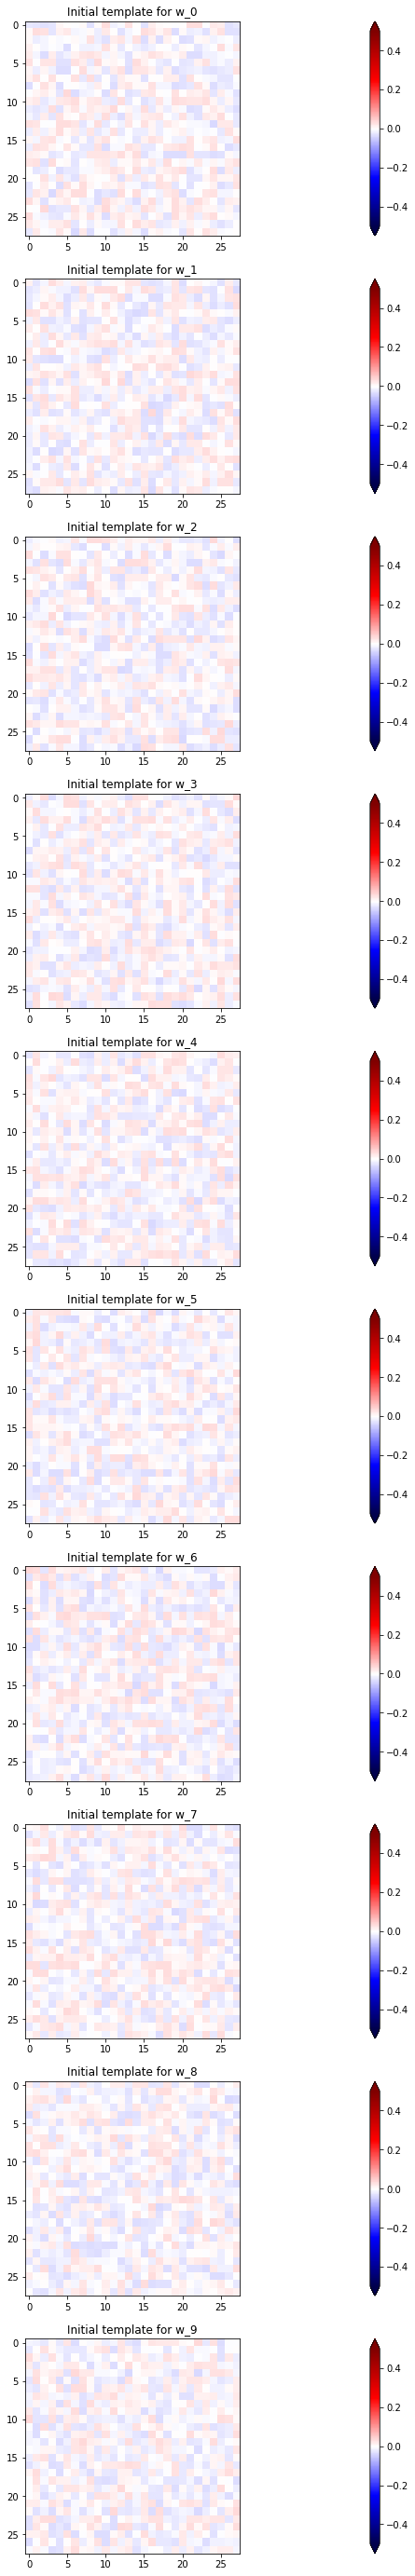

In [33]:
#fig, ax = plt.subplots(nrows=10, ncols=1)
fig = plt.figure(figsize=(50, 50))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(w[i].view(28,28),vmin=-.5,vmax=.5,cmap='seismic')
    plt.title('Initial template for w_{}'.format(i))
    plt.colorbar(extend="both")


In [34]:
hyperP = dict()
hyperP['numEpoch'] = 40
hyperP['learning_rate'] = .00001
hyperP['batchSize'] = 4

In [35]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms   # transform PIL image to tensor

In [36]:
MNIST_training_set_tensor = datasets.FashionMNIST('data_fashionMNIST',
                                           train=True, download=True, transform=transforms.ToTensor())
MNIST_test_set_tensor = datasets.FashionMNIST('data_fashionMNIST',
                                       train=False, download=True, transform=transforms.ToTensor())
myLoader_train = DataLoader(MNIST_training_set_tensor, shuffle=True, batch_size=hyperP['batchSize'])
myLoader_test = DataLoader(MNIST_test_set_tensor, shuffle=False, batch_size=hyperP['batchSize'])
N_train=len(myLoader_train)*4 #We need to multiply loader train size by 4 to get training set size
N_test=len(myLoader_test)*4 #We need to multiply loader test size by 4 to get training set size
print(N_train)
print(N_test)


60000
10000


In [37]:
optimizer = torch.optim.Adam(myModel.parameters(), lr=hyperP['learning_rate'])
import pandas as pd
df = pd.DataFrame(columns=('epoch', 'loss_train', 'loss_test','accuracy_train','accuracy_test'))

-- epoch 0
Ntrain: 60000
Ntest: 10000
  train average loss: 1.292036024294297
  test average loss: 0.9231032524645328
 accuracy (train, test): 0.6270, 0.6851
-- epoch 1
Ntrain: 60000
Ntest: 10000
  train average loss: 0.8197898643838862
  test average loss: 0.7666632107794285
 accuracy (train, test): 0.7238, 0.7365
-- epoch 2
Ntrain: 60000
Ntest: 10000
  train average loss: 0.7160424831666052
  test average loss: 0.7001533456668257
 accuracy (train, test): 0.7595, 0.7563
-- epoch 3
Ntrain: 60000
Ntest: 10000
  train average loss: 0.6624931026553115
  test average loss: 0.660410911051929
 accuracy (train, test): 0.7781, 0.7724
-- epoch 4
Ntrain: 60000
Ntest: 10000
  train average loss: 0.6277009565466394
  test average loss: 0.6331107990190387
 accuracy (train, test): 0.7908, 0.7820
-- epoch 5
Ntrain: 60000
Ntest: 10000
  train average loss: 0.6025650294853995
  test average loss: 0.6119288107857108
 accuracy (train, test): 0.7997, 0.7905
-- epoch 6
Ntrain: 60000
Ntest: 10000
  train av

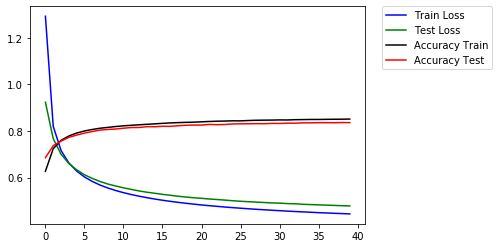

In [38]:
for epoch in range(hyperP['numEpoch']):
    # a new epoch begins
    print('-- epoch '+str(epoch))
    running_loss_train = 0.0
    miniBatch_train = 0
    accuracy_train = 0.0
    N_train=0
    for X,y in myLoader_train:
        # (X,y) is a mini-batch:
        #    X size Nx1x28x28 (N: size mini-batch, 1: only one color, 28x28: widthxheigh)
        #    y size N
        # 1) initialize the gradient "∇ loss" to zero
        optimizer.zero_grad()
        # 2) compute the score and loss 
        N,_,nX,nY = X.size()
        score = myModel(X.view(N,nX*nY))
        loss = myLoss(score, y)
        # 3) estimate the gradient (back propagation -> explain next week!)
        loss.backward()
        # 4) update the parameters
        optimizer.step()
        # 5) estimate the overall loss over the all training set
        running_loss_train += loss.detach().numpy()
        accuracy_train += (score.argmax(dim=1)==y).sum().numpy()
        N_train += (score.argmax(dim=1)==y).sum().numpy() + (score.argmax(dim=1)!=y).sum().numpy()
        miniBatch_train += 1
    #test
    running_loss_test = 0.0
    accuracy_test = 0.0
    miniBatch_test=0
    N_test=0
    myModel.eval()
    for X,y in myLoader_test:
        N,_,nX,nY = X.size()
        score = myModel(X.view(N,nX*nY))
        loss = myLoss(score,y)
        running_loss_test += loss.detach().numpy()
        accuracy_test +=  (score.argmax(dim=1)==y).sum().numpy()
        N_test +=  (score.argmax(dim=1)==y).sum().numpy() + (score.argmax(dim=1)!=y).sum().numpy()
        miniBatch_test+=1
    # end epoch
    loss_train = running_loss_train/miniBatch_train
    loss_test = running_loss_test/miniBatch_test
    accuracy_train /= N_train
    accuracy_test /= N_test
    print('Ntrain: ' + str(N_train))
    print('Ntest: ' + str(N_test))
    print('  train average loss: '+str(running_loss_train/miniBatch_train))
    print('  test average loss: '+str(running_loss_test/miniBatch_test))
    df.loc[epoch] = (epoch,loss_train,loss_test,accuracy_train,accuracy_test)
    print(' accuracy (train, test): {:.4f}, {:.4f}'.format(accuracy_train, accuracy_test))
    #print(df.loc[epoch])
plt.plot(df['epoch'],df['loss_train'],color='blue', label= r'Train Loss') 
plt.plot(df['epoch'],df['loss_test'],color='green', label= r'Test Loss')
plt.plot(df['epoch'],df['accuracy_train'],color='black', label= r'Accuracy Train')
plt.plot(df['epoch'],df['accuracy_test'],color='red', label= r'Accuracy Test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [39]:
w = myModel.state_dict()['weight']
bias = myModel.state_dict()['bias']
print(w.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


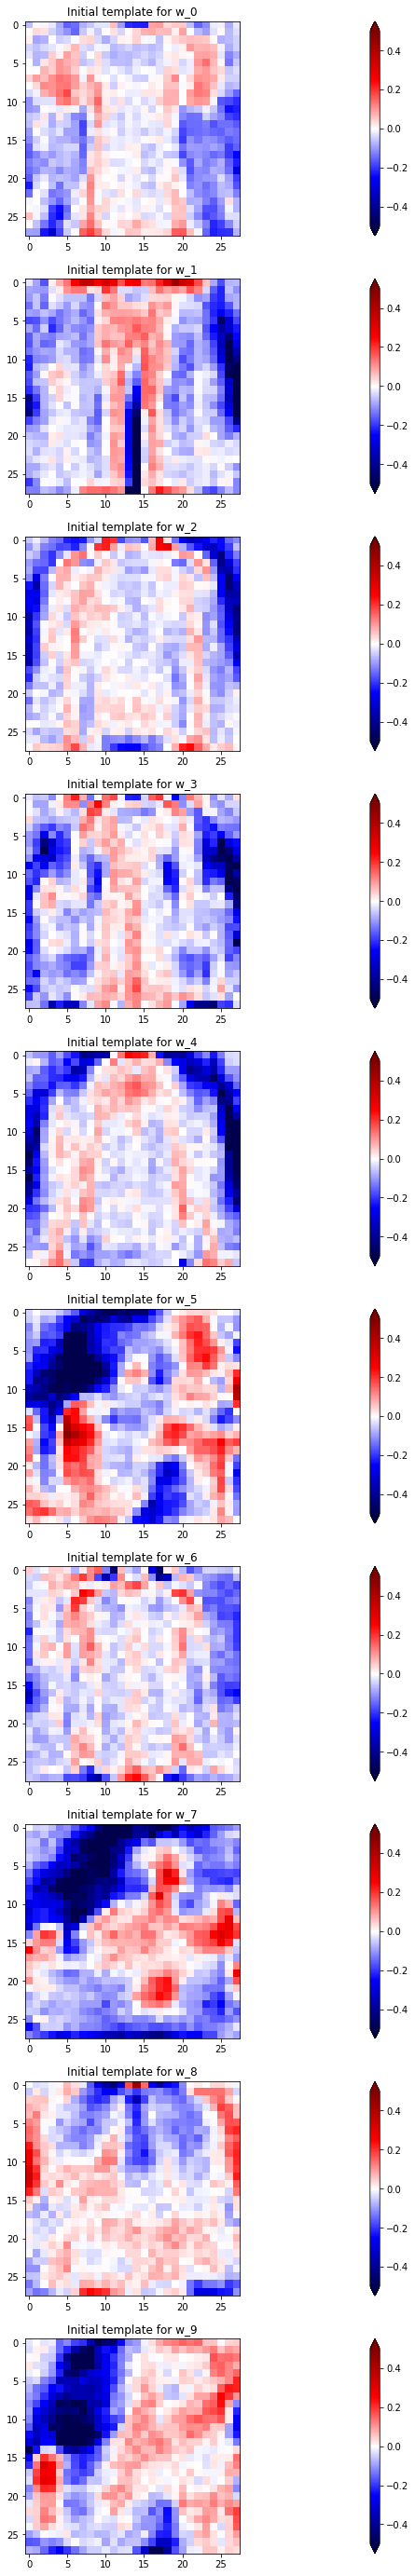

In [40]:
fig = plt.figure(figsize=(50, 50))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(w[i].view(28,28),vmin=-.5,vmax=.5,cmap='seismic')
    plt.title('Initial template for w_{}'.format(i))
    plt.colorbar(extend="both")
    